# Detecção de Anomalias em Requisições Diárias

## Contexto
Variações inesperadas no volume de requisições podem indicar falhas
operacionais ou mudanças abruptas no comportamento dos usuários.

## Objetivo
Identificar automaticamente dias com volume de requisições fora do padrão,
utilizando estatística descritiva e análise temporal.


In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dataframe
df = pd.read_csv("../data/requisicoes_diarias.csv")
df['data'] = pd.to_datetime(df['data'])
df = df.sort_values('data').reset_index(drop=True)

In [3]:
df.head()

,data,quantidade_requisicoes
0,2023-01-01,820
1,2023-01-02,1340
2,2023-01-03,1280
3,2023-01-04,1250
4,2023-01-05,1305


In [4]:
# Média Móvel e Limites Estatísticos
df['media_movel'] = df['quantidade_requisicoes'].rolling(7).mean()
df['desvio'] = df['quantidade_requisicoes'].rolling(7).std()

df['limite_superior'] = df['media_movel'] + 2 * df['desvio']
df['limite_inferior'] = df['media_movel'] - 2 *df['desvio']

In [5]:
# Identificação de Anomalias
df['anomalia'] = (
    (df['quantidade_requisicoes'] > df['limite_superior']) |
    (df['quantidade_requisicoes'] < df['limite_inferior'])
)

df[df['anomalia']]

,data,quantidade_requisicoes,media_movel,desvio,limite_superior,limite_inferior,anomalia


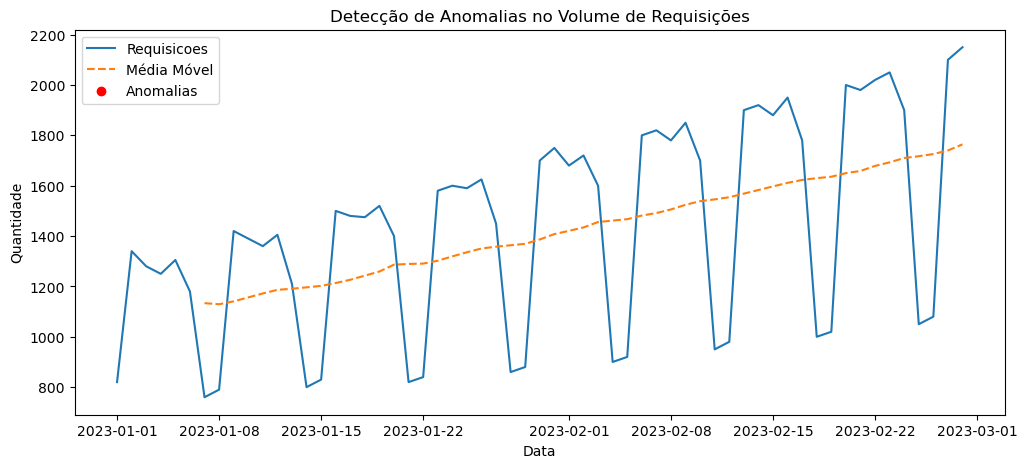

In [10]:
# Visualização das Anomalias
plt.figure(figsize=(12,5))
plt.plot(df['data'], df['quantidade_requisicoes'], label='Requisicoes')
plt.plot(df['data'], df['media_movel'], label='Média Móvel', linestyle='--')

plt.scatter(
    df.loc[df['anomalia'],'data'],
    df.loc[df['anomalia'],'quantidade_requisicoes'],
    color='red',
    label='Anomalias'
)

plt.legend()
plt.title("Detecção de Anomalias no Volume de Requisições")
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.show()

## Interpretação das Anomalias

As anomalias identificadas representam dias com volume significativamente
acima ou abaixo do comportamento esperado.

Esses eventos podem indicar:
- Picos inesperados de acesso
- Falhas operacionais
- Problemas de capacidade

A detecção antecipada dessas ocorrências permite ações preventivas
e melhora a estabilidade da operação.


## Conclusão

A aplicação de regras estatísticas simples permitiu identificar anomalias
de forma clara e interpretável, sem necessidade de modelos complexos.

## Próximos Passos
- Ajustar janelas e limites estatísticos
- Automatizar alertas
- Integrar com monitoramento em tempo real
